<a href="https://colab.research.google.com/github/asynchronos/ML_Programing_in_Practice/blob/main/IMC_Training_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab I : Classification Model**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

!gsutil cp gs://imcinstitute/data/flight.csv .
flight = pd.read_csv("flight.csv")


Copying gs://imcinstitute/data/flight.csv...
/ [1 files][  1.5 MiB/  1.5 MiB]                                                
Operation completed over 1 objects/1.5 MiB.                                      


In [2]:
#Data Exploration
flight.head(5)

Index(['date', 'airline', 'departure_airport', 'arrival_airport',
       'departure_delay', 'arrival_delay', 'dayofweek', 'month', 'delayed'],
      dtype='object')

In [3]:
flight.shape

(47785, 9)

In [4]:
flight.columns

Index(['date', 'airline', 'departure_airport', 'arrival_airport',
       'departure_delay', 'arrival_delay', 'dayofweek', 'month', 'delayed'],
      dtype='object')

In [5]:
flight.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47785 entries, 0 to 47784
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               47785 non-null  object
 1   airline            47785 non-null  object
 2   departure_airport  47785 non-null  object
 3   arrival_airport    47785 non-null  object
 4   departure_delay    47785 non-null  int64 
 5   arrival_delay      47785 non-null  int64 
 6   dayofweek          47785 non-null  int64 
 7   month              47785 non-null  int64 
 8   delayed            47785 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.3+ MB


In [6]:
flight.isnull().sum()

date                 0
airline              0
departure_airport    0
arrival_airport      0
departure_delay      0
arrival_delay        0
dayofweek            0
month                0
delayed              0
dtype: int64

In [12]:
flight['airline'].value_counts()

OO    13863
UA    12018
WN     7814
AA     4039
CO     2383
US     1680
DL     1392
AS     1322
NW     1145
B6      661
F9      479
MQ      441
FL      410
HA      132
YV        6
Name: airline, dtype: int64

In [13]:
flight['departure_airport'].value_counts()

SFO    47785
Name: departure_airport, dtype: int64

In [14]:
flight['arrival_airport'].value_counts()

LAX    4240
SAN    2513
LAS    2388
DEN    2185
ORD    1975
       ... 
MCI      34
FLL      33
ASE      28
ANC      25
BZN      15
Name: arrival_airport, Length: 69, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68907a0780>,
      dtype=object)

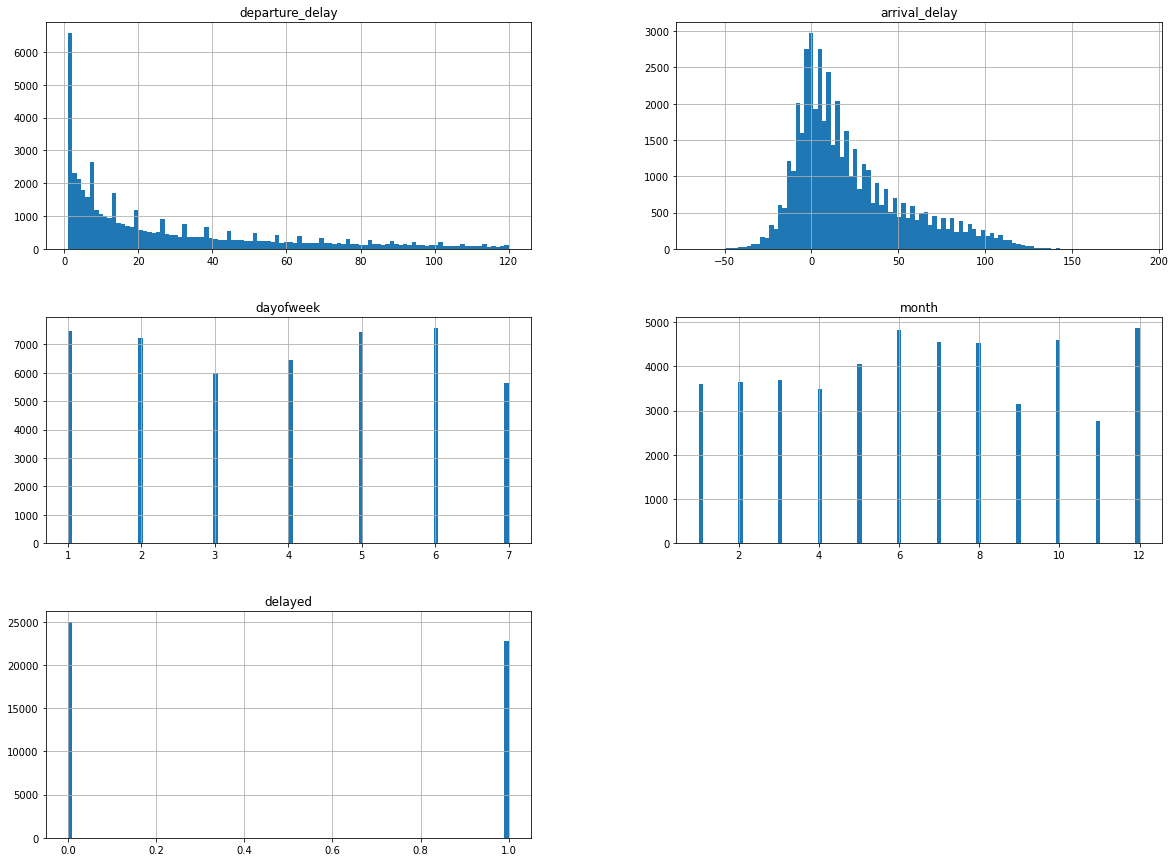

In [16]:
flight.hist(bins=100, figsize=(20,15))

In [20]:
flight.describe()
flight.describe(include=['int', 'int64', 'float', 'object'])

,date,airline,departure_airport,arrival_airport,departure_delay,arrival_delay,dayofweek,month,delayed
count,47785,47785,47785,47785,47785.000000,47785.000000,47785.000000,47785.000000,47785.000000
unique,365,15,1,69,NaN,NaN,NaN,NaN,NaN
top,2009-12-21,OO,SFO,LAX,NaN,NaN,NaN,NaN,NaN
freq,280,13863,47785,4240,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,27.721147,22.218269,3.930438,6.624150,0.477158
std,NaN,NaN,NaN,NaN,29.436796,31.939881,1.995762,3.392922,0.499483
min,NaN,NaN,NaN,NaN,1.000000,-65.000000,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,5.000000,-1.000000,2.000000,4.000000,0.000000
50%,NaN,NaN,NaN,NaN,16.000000,13.000000,4.000000,7.000000,0.000000
75%,NaN,NaN,NaN,NaN,42.000000,38.000000,6.000000,10.000000,1.000000


In [24]:
#Data Cleansing
flight.fillna(0,inplace=True)

for col in ['dayofweek' , 'month']:
   flight[col] = flight[col].astype('category')

In [25]:
#drop unnecessary column
flight.drop(['date','arrival_delay','departure_airport'], axis=1, inplace=True)

In [26]:
flight.shape

(47785, 6)

In [27]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47785 entries, 0 to 47784
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   airline          47785 non-null  object  
 1   arrival_airport  47785 non-null  object  
 2   departure_delay  47785 non-null  int64   
 3   dayofweek        47785 non-null  category
 4   month            47785 non-null  category
 5   delayed          47785 non-null  int64   
dtypes: category(2), int64(2), object(2)
memory usage: 1.6+ MB


In [31]:
flight.describe

<bound method NDFrame.describe of       airline arrival_airport  departure_delay dayofweek month  delayed
0          WN             LAX                2         5     2        0
1          WN             LAX               47         5     2        1
2          WN             LAX               52         5     2        1
3          WN             LAX               92         5     2        1
4          WN             LAX               80         5     2        1
...       ...             ...              ...       ...   ...      ...
47780      CO             EWR               33         5     3        1
47781      CO             EWR                9         6     3        1
47782      CO             EWR                1         2     3        0
47783      CO             EWR               52         5     4        1
47784      CO             EWR                1         2     3        0

[47785 rows x 6 columns]>

In [32]:
flight.describe(include=['int', 'int64', 'float', 'object'])

,airline,arrival_airport,departure_delay,delayed
count,47785,47785,47785.000000,47785.000000
unique,15,69,NaN,NaN
top,OO,LAX,NaN,NaN
freq,13863,4240,NaN,NaN
mean,NaN,NaN,27.721147,0.477158
std,NaN,NaN,29.436796,0.499483
min,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,5.000000,0.000000
50%,NaN,NaN,16.000000,0.000000
75%,NaN,NaN,42.000000,1.000000


In [34]:
#One-hot encoding
flight = pd.get_dummies(flight)

In [36]:
flight.shape

(47785, 105)

In [37]:
flight.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47785 entries, 0 to 47784
Data columns (total 105 columns):
 #   Column               Dtype
---  ------               -----
 0   departure_delay      int64
 1   delayed              int64
 2   airline_AA           uint8
 3   airline_AS           uint8
 4   airline_B6           uint8
 5   airline_CO           uint8
 6   airline_DL           uint8
 7   airline_F9           uint8
 8   airline_FL           uint8
 9   airline_HA           uint8
 10  airline_MQ           uint8
 11  airline_NW           uint8
 12  airline_OO           uint8
 13  airline_UA           uint8
 14  airline_US           uint8
 15  airline_WN           uint8
 16  airline_YV           uint8
 17  arrival_airport_ABQ  uint8
 18  arrival_airport_ACV  uint8
 19  arrival_airport_ANC  uint8
 20  arrival_airport_ASE  uint8
 21  arrival_airport_ATL  uint8
 22  arrival_airport_AUS  uint8
 23  arrival_airport_BFL  uint8
 24  arrival_airport_BOI  uint8
 25  arrival_airport_BOS  

In [38]:
#Create Train and Evaluate dataset
X = flight.drop('delayed',axis=1)
y = flight['delayed']


from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)


Training features/target: (38228, 104) (38228,)
Testing features/target: (9557, 104) (9557,)


In [39]:
#import Scikit-learn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Create Decision Tree classifier object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifier
decision_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
#Make prediction
y_pred = decision_tree_classifier.predict(X_test)
y_pred[0:5]


array([0, 0, 1, 1, 0])

In [46]:
#predict probabilities
y_pred_prob = decision_tree_classifier.predict_proba(X_test)
y_pred_prob[0:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (predict/actual):\n", pd.DataFrame(cm))


Confusion Matrix (predict/actual):
       0     1
0  4275   769
1   822  3691


In [48]:
decision_tree_classifier.score(X_test, y_test)


0.8335251648006696

In [49]:
recall = np.diag(cm) / np.sum(cm, axis=1)
print("\nRecall:\n", pd.Series(recall))

precision = np.diag(cm) / np.sum(cm, axis=0)
print("\nPrecision:\n", pd.Series(precision))


from sklearn.metrics import f1_score
weighted_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 score:\n", weighted_f1)



Recall:
 0    0.847542
1    0.817860
dtype: float64

Precision:
 0    0.838729
1    0.827578
dtype: float64

F1 score:
 0.8334685384127342


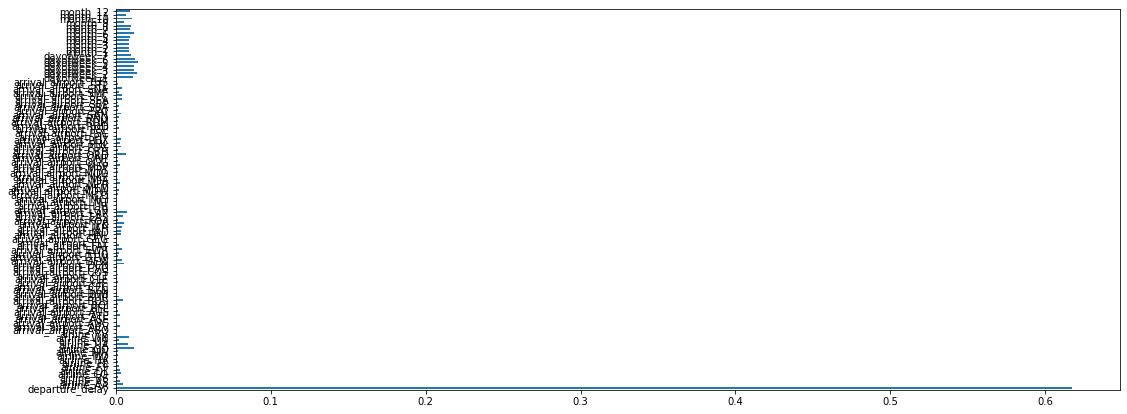

In [51]:
%matplotlib inline
pd.Series(decision_tree_classifier.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));


In [52]:
pd.Series(decision_tree_classifier.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)

departure_delay    0.617562
dayofweek_5        0.014171
dayofweek_2        0.013418
dayofweek_6        0.012229
airline_OO         0.011835
month_6            0.011754
dayofweek_3        0.011750
dayofweek_4        0.011451
dayofweek_1        0.011302
month_10           0.010509
dayofweek_7        0.009928
month_8            0.009795
month_12           0.009144
month_5            0.008962
month_7            0.008863
month_2            0.008819
month_4            0.008690
month_3            0.008639
airline_WN         0.008428
month_1            0.008400
dtype: float64